In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
sys.path.append("/home/psa_images/SemiF-AnnotationPipeline/segment/")
sys.path.append("/home/psa_images/SemiF-AnnotationPipeline/")
from semif_utils.utils import cutoutmeta2csv


In [14]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

pardir = "../data/semifield-cutouts/"
cutout_dirs = sorted(get_immediate_subdirectories(pardir))

cutout_csvs =  [x.stem for x in Path(pardir).rglob("*.csv")]
# cutoutdir = "../data/semifield-cutouts/TX_2023-01-25"
cutoutdir = "../data/semifield-cutouts"
batch = False

In [16]:
if not batch:
    data = Path(cutoutdir).glob("*")
    csvs = []
    for a in data:
        csv = list(a.glob("*.csv"))
        if len(csv) > 0:
            csvs.append(csv[0])
    df = pd.concat([pd.read_csv(x, low_memory=False) for x in csvs])
else:
    x = list(Path(cutoutdir).glob("*.csv"))
    df = pd.read_csv(x[0], low_memory=False)

df["state_id"] = df.batch_id.str.split("_", expand=False).str[0]
df["date"] = df.batch_id.str.split("_", expand=False).str[1]
df["common_name"] = np.where(df.common_name == "Common lambsquarters", "Lambsquarter", df.common_name)
df['dt'] = pd.to_datetime(df['date'])
df.columns.unique()[80:100]
df.USDA_symbol.unique()


array(['colorchecker', 'AVSA', 'BRASS2', 'AVST2', 'RASA2', 'plant',
       'HORDE', 'SECE', 'TRITI2', 'TRAE'], dtype=object)

## Stats

## All images

In [65]:
sdf = df.drop_duplicates("image_id")
sdf = sdf.groupby(["common_name", "state_id"]).image_id.count().reset_index().sort_values("image_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
print("Number of images by common name and state")
print(sdf.reset_index(drop=True))


Number of images by common name and state
         common_name state_id  image_id
0         Cereal rye       NC       375
1               Oats       NC       480
2          Triticale       NC       741
3             Barley       NC       807
4       Winter wheat       NC       841
5           Mustards       TX      1602
6  cultivated radish       TX      1824
7               Oats       TX      1965
8         Black oats       TX      2063


Text(0.5, 0.98, 'Number of images by common name and state')

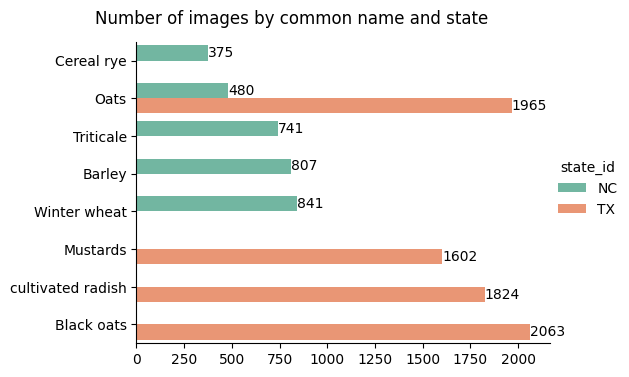

In [66]:
g = sns.catplot(
    data=sdf, x="image_id", y="common_name",hue="state_id",height=4, aspect=1.5,
    kind="bar",palette=sns.color_palette(['#66c2a5', '#fc8d62'])) #8da0cb)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.set(xlabel="", ylabel="")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of images by common name and state')

## All cutouts

In [41]:

sdf = df.groupby(["common_name", "state_id"]).cutout_id.count().reset_index().sort_values("cutout_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
print("Number of cutouts (sub-images) by common name and state")
print(sdf)

Number of cutouts (sub-images) by common name and state
          common_name state_id  cutout_id
11            unknown       TX          6
2          Cereal rye       NC      27078
3            Mustards       TX      28419
4                Oats       NC      38367
10  cultivated radish       TX      42990
6           Triticale       NC      51126
7        Winter wheat       NC      57759
0              Barley       NC      65841
5                Oats       TX     118587
1          Black oats       TX     163236


Text(0.5, 0.98, 'Number of cutouts (sub-images) by common name and state')

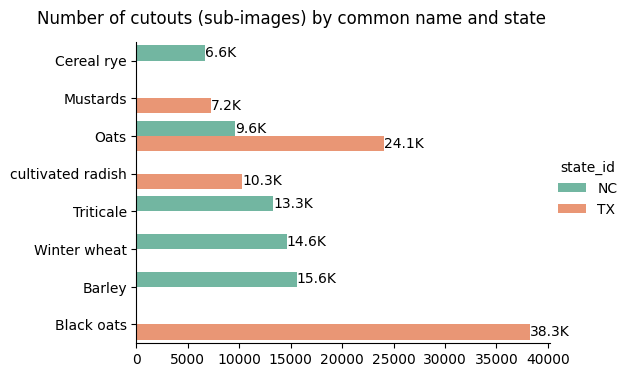

In [63]:
g = sns.catplot(
    data=sdf, x="cutout_id", y="common_name",hue="state_id",height=4, aspect=1.5,
    kind="bar",palette=sns.color_palette(['#66c2a5', '#fc8d62'])) #8da0cb)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width()/1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.set(xlabel="", ylabel="")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of cutouts (sub-images) by common name and state')

## Primary Cutouts (unique)

In [44]:
sdf = df[df["is_primary"] == True]
sdf = sdf.groupby(["common_name", "state_id"]).cutout_id.count().reset_index().sort_values("cutout_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
print("Number of unique cutouts (sub-images) by common name and state")
print(sdf)


Number of unique cutouts (sub-images) by common name and state
          common_name state_id  cutout_id
2          Cereal rye       NC       6627
3            Mustards       TX       7224
4                Oats       NC       9567
10  cultivated radish       TX      10269
6           Triticale       NC      13299
7        Winter wheat       NC      14622
0              Barley       NC      15573
5                Oats       TX      24057
1          Black oats       TX      38292


Text(0.5, 0.98, 'Number of unique cutouts (sub-images) by common name and state')

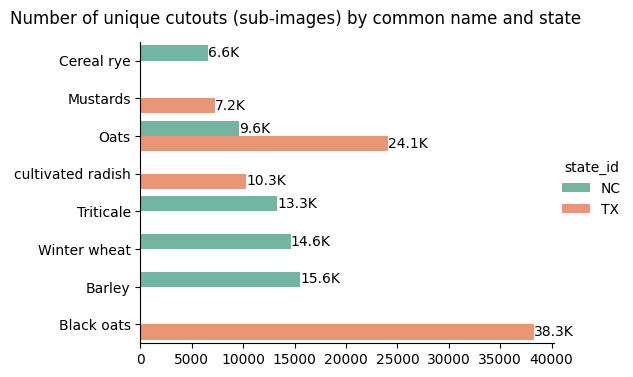

In [62]:
g = sns.catplot(
    data=sdf, x="cutout_id", y="common_name",hue="state_id",height=4, aspect=1.5,
    kind="bar", palette=sns.color_palette(['#66c2a5', '#fc8d62'])) #8da0cb

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_width()/1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g.set(xlabel="", ylabel="")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp

g.fig.suptitle('Number of unique cutouts (sub-images) by common name and state')

# Total Number of batches

/home/mkutuga/anaconda3/envs/semif/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


Text(0.5, 0.98, 'Number of Full Bench Images by Batch')

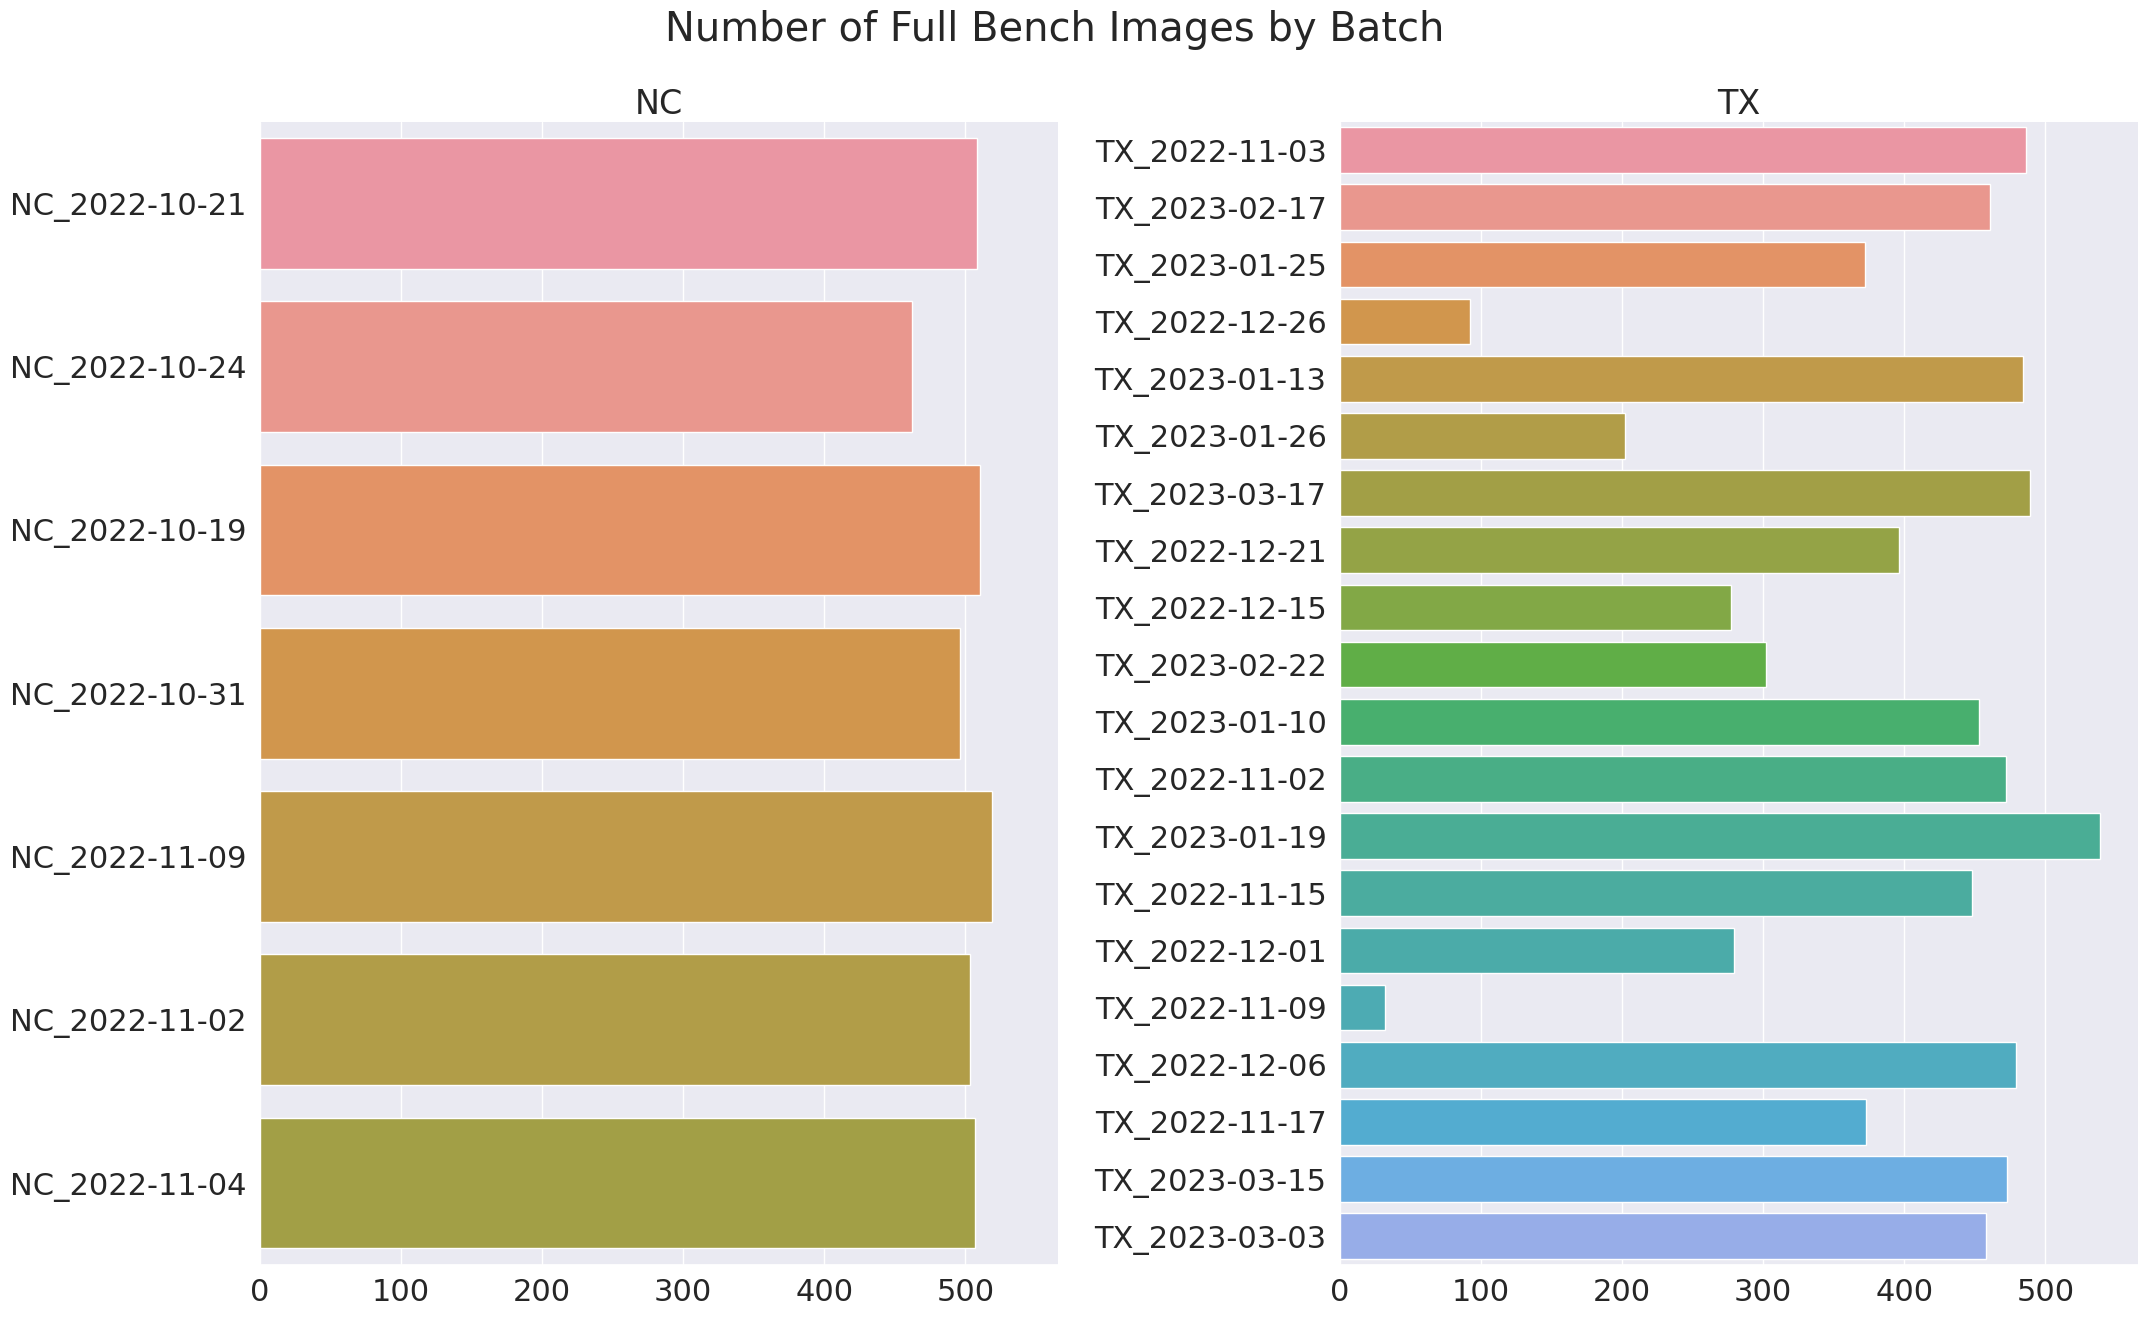

In [77]:
# plt.style.use('ggplot')
sns.set_context("notebook")
sns.set(font_scale=2)
tdf = df.drop_duplicates("image_id").sort_values("state_id")

g = sns.catplot(
    data=tdf,
    y="batch_id",
    col="state_id",
    sharey=False,
    kind="count",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Full Bench Images by Batch')
# g.savefig("../assets/Images_by_batch_summer_weeds_2022.png", dpi=300)

# Number of images per species

/home/mkutuga/anaconda3/envs/semif/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


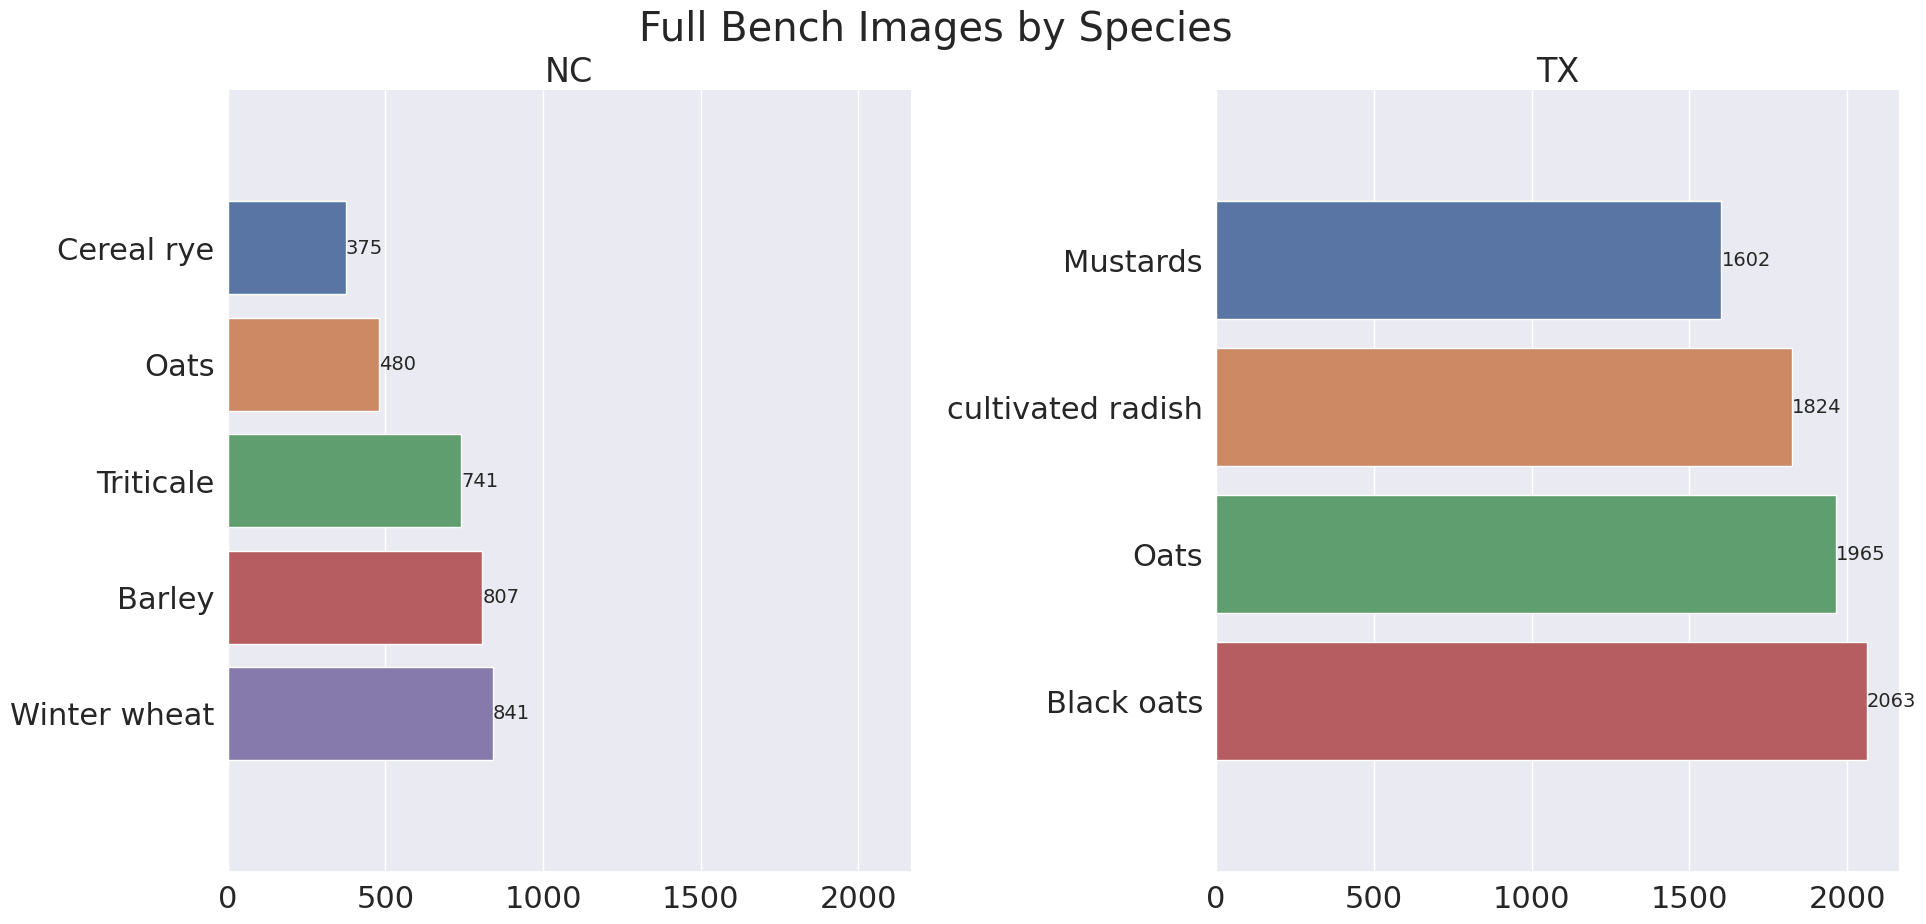

In [78]:

sns.set(font_scale=2)
sdf = df.drop_duplicates("image_id")
sdf = sdf.groupby(["common_name", "state_id"]).image_id.count().reset_index().sort_values("image_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
# print(sdf)
g = sns.catplot(
    data=sdf,
    x="image_id",
    y="common_name",
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    height=10
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Full Bench Images by Species')
# g.savefig("../assets/Images_by_species_summer_weeds_2022.png", dpi=300)
# sns.set(font_scale=1)
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        # labels = [f'{(v.get_width() / 1000):.1f}K' for v in c]
        labels = [int(v.get_width()) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge',fontsize=14)
    ax.margins(y=0.2)
# g.savefig("../assets/Images_by_species_summer_weeds_2022_labeled.png", dpi=300)
plt.show()

## Number of Cutout sub-images by batch

Text(0.5, 0.98, 'Number of Cutouts (sub-images) by Batch')

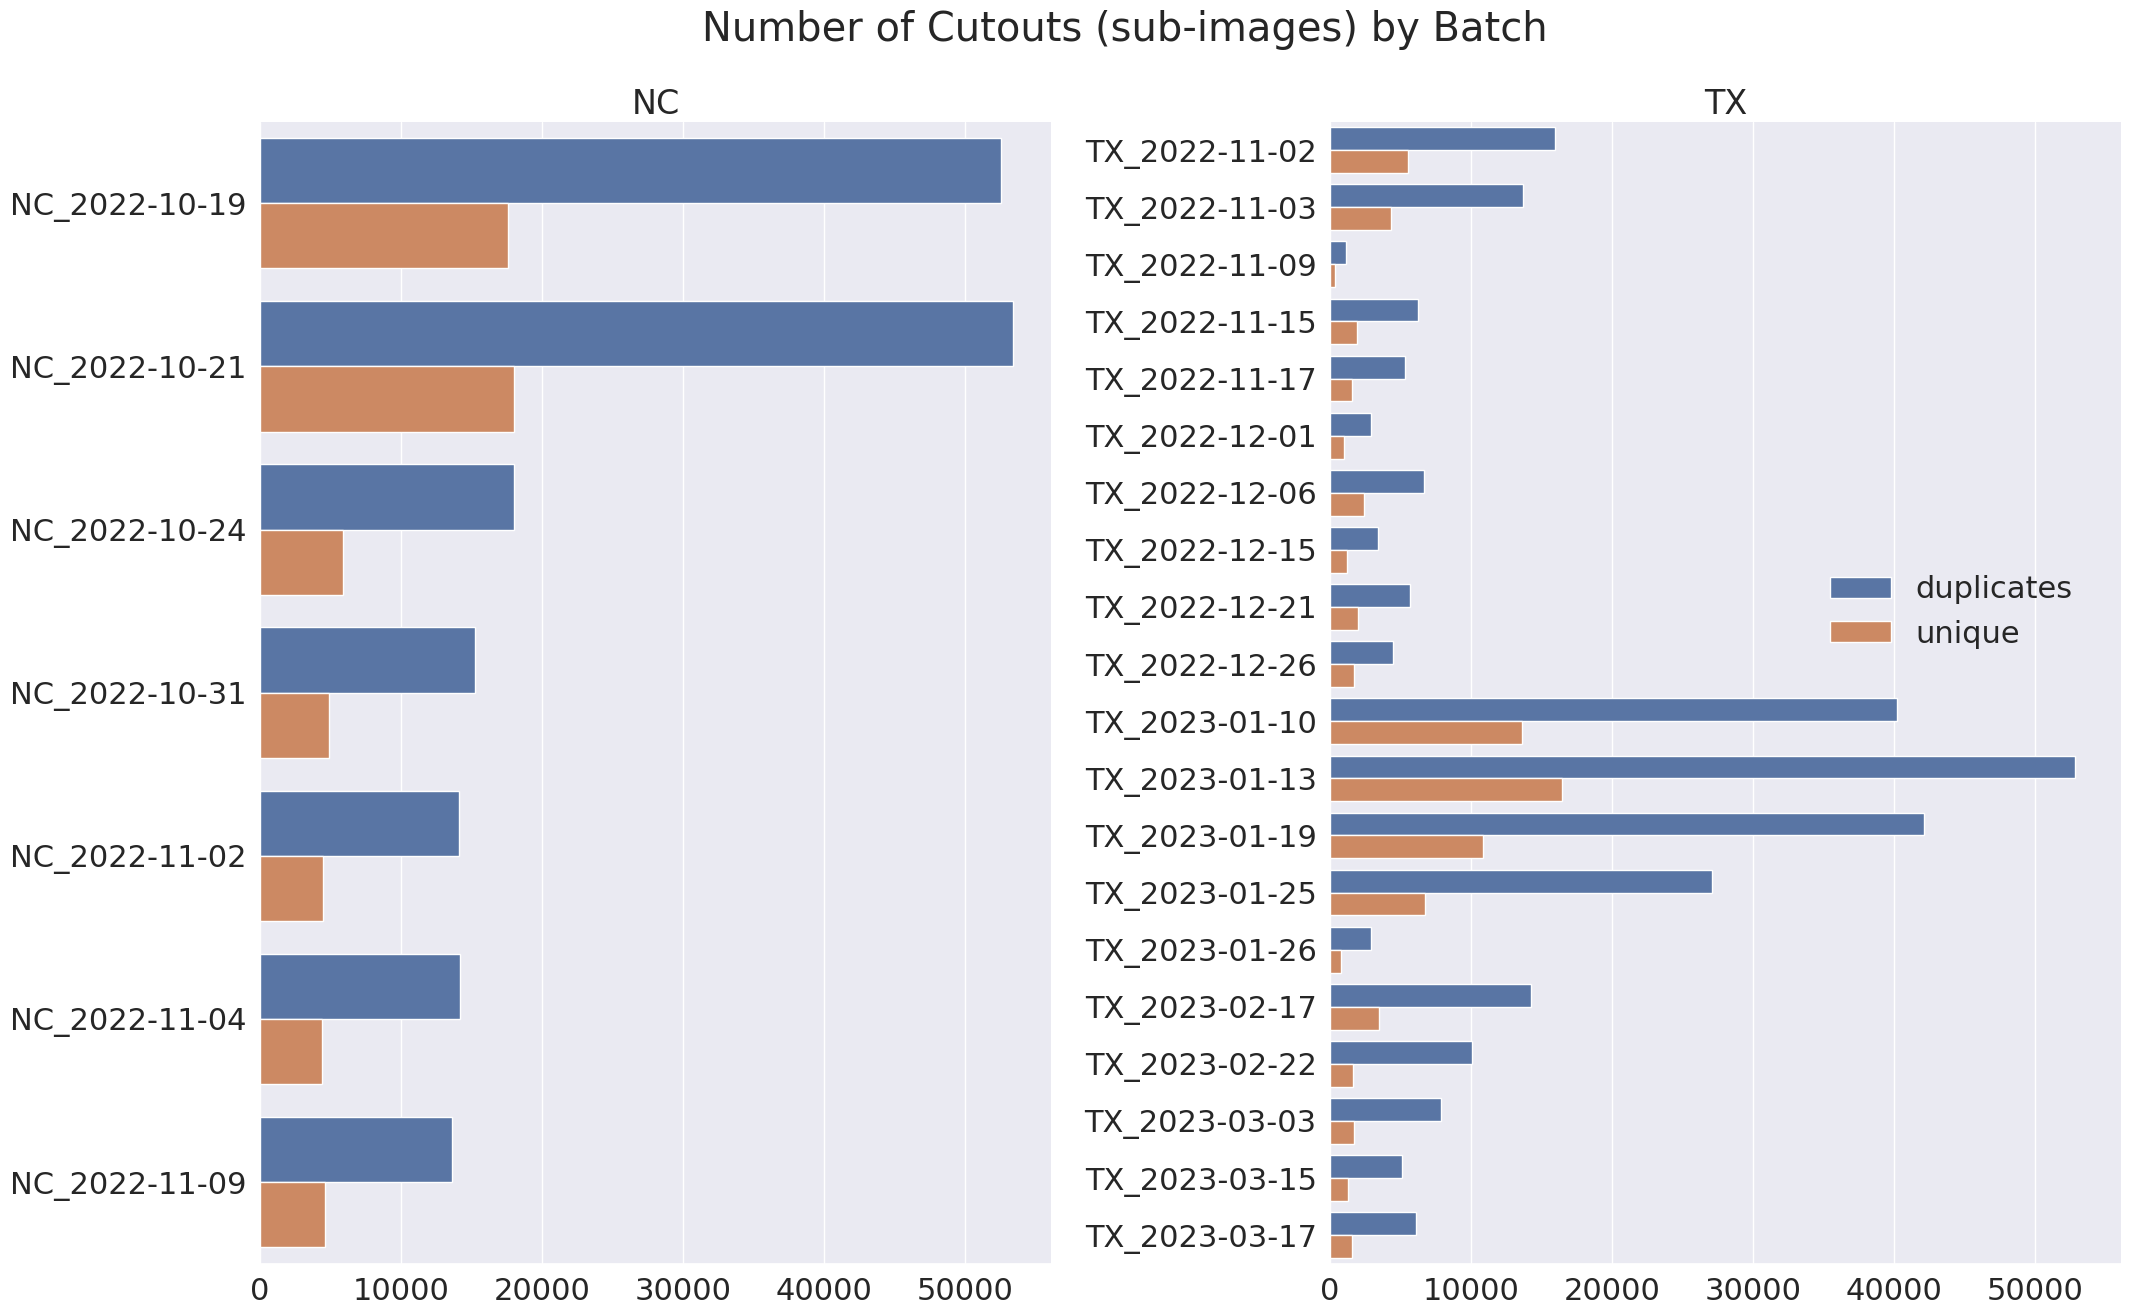

In [79]:
c = df.groupby(["batch_id", "state_id","is_primary"]).cutout_id.count().reset_index().sort_values("batch_id")
sns.set(font_scale=2)

g = sns.catplot(
    data=c,
    x="cutout_id",
    y="batch_id",
    hue="is_primary", 
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g._legend.set_title("")
# replace labels
new_labels = ['duplicates', 'unique']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(g, "center right", bbox_to_anchor=(.9, .55), frameon=False)

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Cutouts (sub-images) by Batch')
# g.savefig("../assets/Cutouts_by_batch_summer_weeds_2022.png", dpi=300)


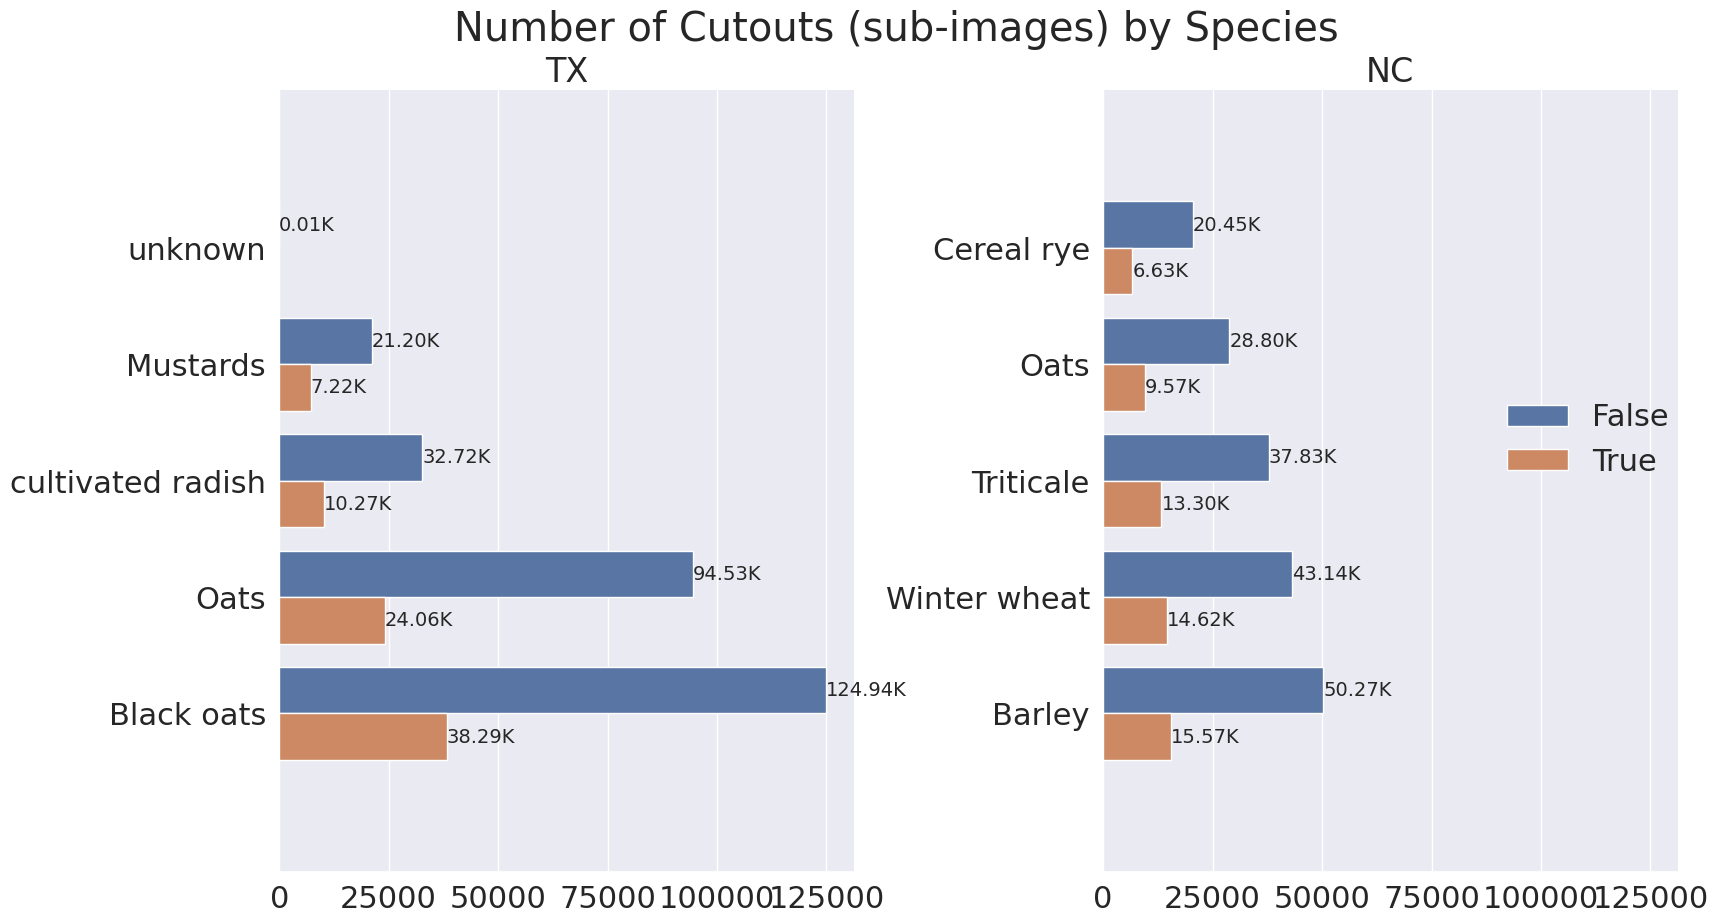

In [98]:
c = df.groupby(["common_name", "state_id", "is_primary"]).cutout_id.count().reset_index().sort_values("cutout_id")
c = c[c["common_name"]!="colorchecker"]

sns.set(font_scale=2)

g = sns.catplot(
    data=c,
    x="cutout_id",
    y="common_name",
    hue="is_primary",
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    aspect=.9,
    height=10
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g._legend.set_title("")
# replace labels
new_labels = ['duplicates', 'unique']
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

sns.move_legend(g, "center right", bbox_to_anchor=(.9, .55), frameon=False)

# extract the matplotlib axes_subplot objects from the FacetGrid
# ax = g.facet_axis(0, 0)


# g.set(xticks=np.arange(0,36000,10000))
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Cutouts (sub-images) by Species')
# g.savefig("../assets/Cutouts_by_species_summer_weeds_2022.png", dpi=300)
# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_width() / 1000):.2f}K' for v in c]
        # labels = [v.get_width() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=14)
    ax.margins(y=0.2)
# g.savefig("../assets/Cutouts_by_species_summer_weeds_2022_labeled.png", dpi=300)
plt.show()
